**Import necessary libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,BatchNormalization,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score,confusion_matrix

**Load and preprocess the CIFAR-10 dataset**

In [ ]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to range 0 to 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert class labels to one-hot encoding
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)


#The number 255 is chosen because it represents the maximum pixel value in an 8-bit grayscale or RGB image,ranging from 0 (black) to 255 (white) for grayscale images or for each of the (RGB) color channels in color images.
#When we normalize the pixel values by dividing by 255, we scale down the values to be in the range of 0 to 1.

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 10)

In [ ]:
y_train_int = np.argmax(y_train, axis=1)
print("Labels of y_train (integer format):")
print(y_train_int)

Labels of y_train (integer format):
[6 9 9 ... 9 1 1]


**Visualize some sample images from the dataset**

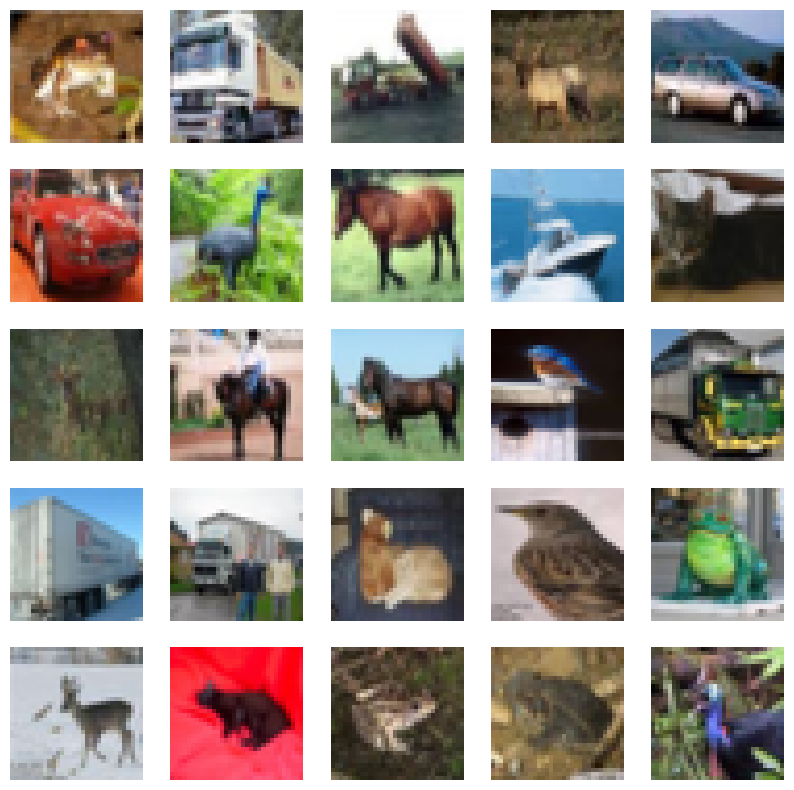

In [ ]:
# Display some sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()


**Create a CNN model**

In [ ]:
# Define the CNN MODEL 1.
model = models.Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3),activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3),activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2)))


# Dense layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10,activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 4, 4, 128)        

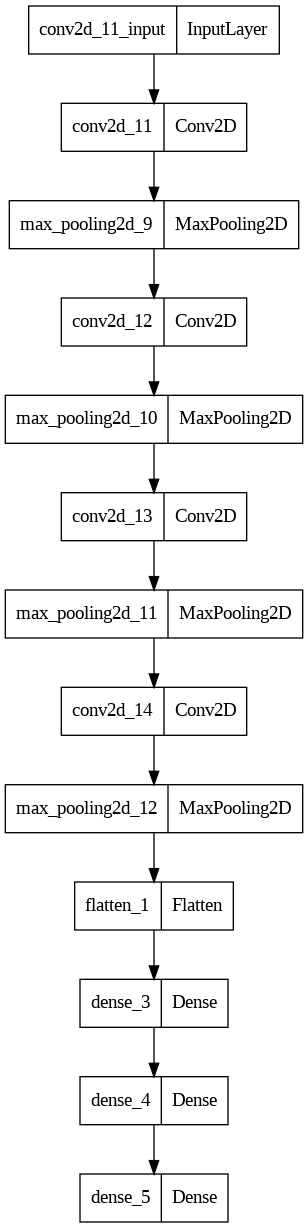

In [ ]:
#PLot the whole MODEL 1.
from keras.utils import plot_model
plot_model(model)

In [ ]:
history = model.fit(X_train,y_train,epochs=25,validation_data=(X_test, y_test))

Epoch 1/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0928 - accuracy: 0.9713 - val_loss: 1.7488 - val_accuracy: 0.7360
Epoch 2/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0892 - accuracy: 0.9726 - val_loss: 1.7307 - val_accuracy: 0.7316
Epoch 3/25
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0829 - accuracy: 0.9738 - val_loss: 1.8585 - val_accuracy: 0.7268
Epoch 4/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0882 - accuracy: 0.9725 - val_loss: 1.7896 - val_accuracy: 0.7367
Epoch 5/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0796 - accuracy: 0.9761 - val_loss: 1.7913 - val_accuracy: 0.7328
Epoch 6/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0894 - accuracy: 0.9728 - val_loss: 1.6402 - val_accuracy: 0.7333
Epoch 7/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0810 - accuracy: 0.9753 - val_loss: 1.8053 - val_accuracy

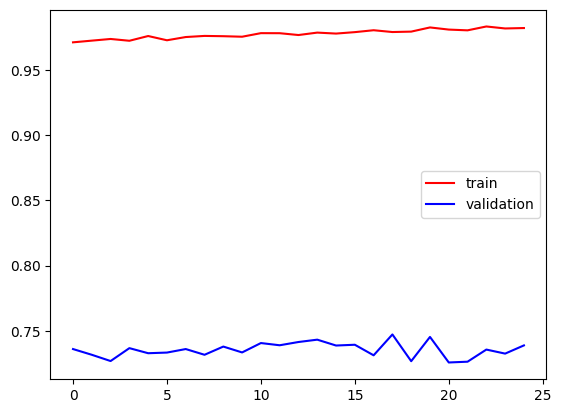

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

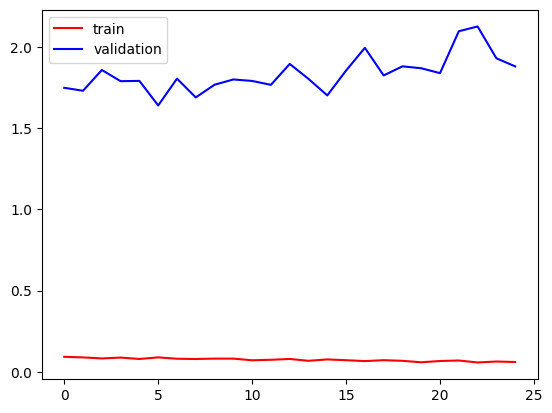

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# Define the CNN MODEL 2.
model = models.Sequential()

# Convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(256,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


# Dense layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_2 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_3 (Bat  (None, 16, 16, 64)        256       
 chNormalization)                                                
                                                      

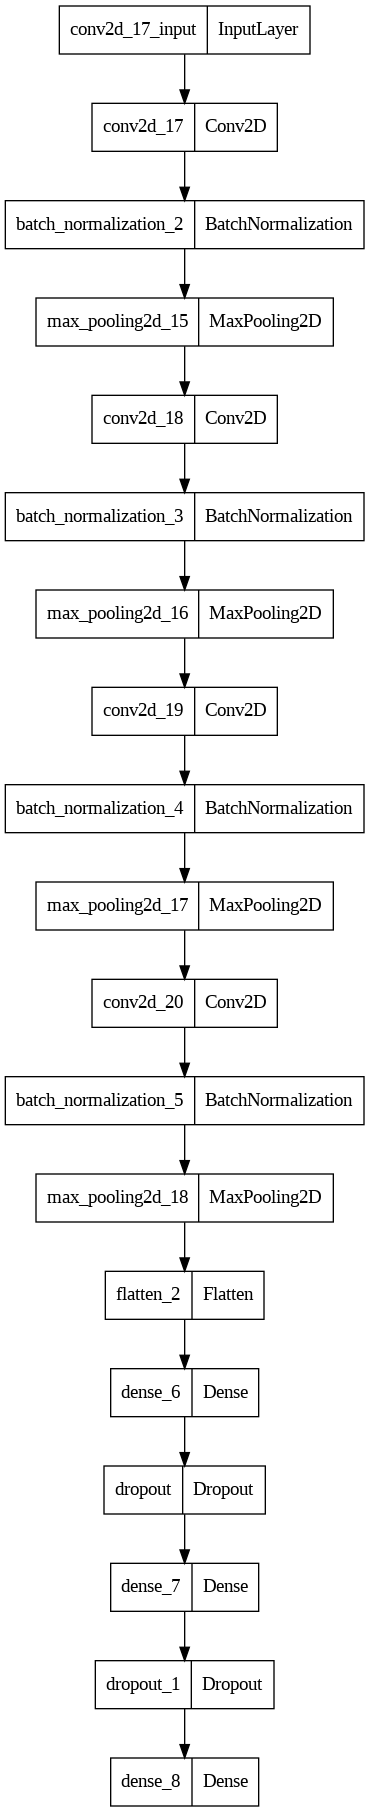

In [ ]:
#PLot the whole MODEL 2.
plot_model(model)

In [ ]:
history = model.fit(X_train,y_train,epochs=25,validation_data=(X_test, y_test))

Epoch 1/25
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1976 - accuracy: 0.5725 - val_loss: 1.1542 - val_accuracy: 0.5942
Epoch 2/25
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8539 - accuracy: 0.7037 - val_loss: 0.8456 - val_accuracy: 0.7174
Epoch 3/25
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6897 - accuracy: 0.7623 - val_loss: 0.8927 - val_accuracy: 0.7003
Epoch 4/25
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5794 - accuracy: 0.8020 - val_loss: 0.7395 - val_accuracy: 0.7561
Epoch 5/25
1563/1563 [==============================] - 12s 7ms/step - loss: 0.4884 - accuracy: 0.8329 - val_loss: 0.8283 - val_accuracy: 0.7389
Epoch 6/25
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4108 - accuracy: 0.8577 - val_loss: 0.8473 - val_accuracy: 0.7519
Epoch 7/25
1563/1563 [==============================] - 11s 7ms/step - loss: 0.3438 - accuracy: 0.8817 - val_loss: 0.9576 - val_ac

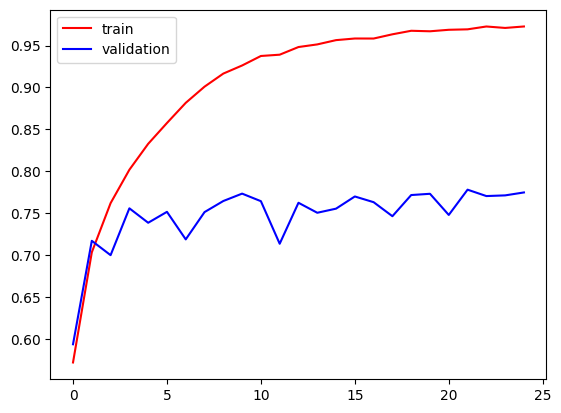

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

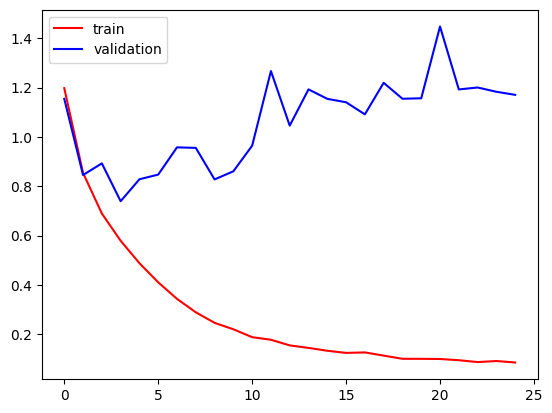

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()